### Imports

In [355]:
#Standard imports
import numpy as np
import healpy as hp
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
import fitsio
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

In [190]:
#VAST imports
from vast.voidfinder.distance import z_to_comoving_dist
from vast.voidfinder.voidfinder_functions import xyz_to_radecz

In [145]:
#Python files
import VoidSlicePlots as vsp
from VoidVolume import volume_of_spheres

### Load voids and galaxies and estimate a RA-DEC slice to the sky to compare in

The below DESI files are constructed by Himalayas_VoidFinder.py and himalayas_select_masked_galaxies.ipynb. The below SDSS files are provided by the VAST catalog. In either case, the file paths should be adjusted as needed when re-running this notebook

In [358]:
desi_maxs = Table.read("desi_full_maximals.txt", format = "ascii.commented_header")
sdss_maxs = Table.read("VoidFinder-nsa_v1_0_1_Planck2018_comoving_maximal.txt", format = "ascii.commented_header")

In [184]:
desi_holes = Table.read("desi_full_holes.txt", format = "ascii.commented_header")
sdss_holes = Table.read("VoidFinder-nsa_v1_0_1_Planck2018_comoving_holes.txt", format = "ascii.commented_header")

In [319]:
desi_holes_full=Table.read("desi_full_holes.txt", format = "ascii.commented_header")
sdss_holes_full = Table.read("VoidFinder-nsa_v1_0_1_Planck2018_comoving_holes.txt", format = "ascii.commented_header")

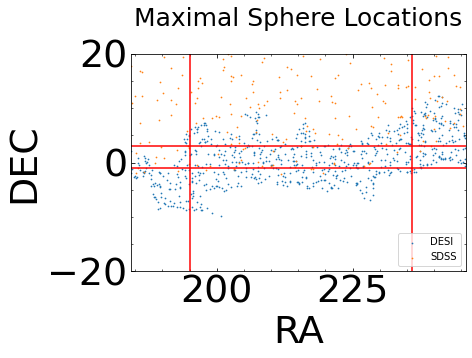

In [360]:
#The region of the sky in which to compare DESI and SDSS
plt.scatter(desi_maxs["ra"]%360,desi_maxs["dec"],s=.5,label="DESI")
plt.scatter(sdss_maxs["ra"],sdss_maxs["dec"],s=.5,label="SDSS")
plt.axis('equal')
plt.xlim((195,235))
plt.axvline(x = 195, color = 'r', linestyle = '-')
plt.axvline(x = 236, color = 'r', linestyle = '-')
plt.axhline(y = -1, color = 'r', linestyle = '-')
plt.axhline(y = 3, color = 'r', linestyle = '-')
plt.xlabel("RA")
plt.ylabel("DEC")
plt.ylim((-20,20))
plt.legend(loc="lower right",fontsize=10)
plt.title("Maximal Sphere Locations",fontsize=25,y=1.1)
plt.show()

In [186]:
#desi galaxies: 
desi_gals = Table.read("himalayas_masked.txt", format = "ascii.commented_header")
#sdss galaxies: 
sdss_gals=Table.read("/Users/hernan/Desktop/Classes/Astr/project/nsa_v1_0_1_main.txt", format = "ascii.commented_header")

### Perform cuts in the data to select galaxies/voids within the desired RA-DEC slice of the sky

In [187]:
cut = np.logical_and.reduce([sdss_gals["ra"] >= 195, 
                             sdss_gals["ra"] <= 236,
                             sdss_gals["dec"] <= 3,
                             sdss_gals["dec"] >= -1,
                             sdss_gals["redshift"] <= 0.114,
                             sdss_gals["rabsmag"] <= -20
                                   ])

sdss_gals = sdss_gals[cut]


In [188]:
cut = np.logical_and.reduce([desi_gals["ra"] >= 195, 
                             desi_gals["ra"] <= 236,
                             desi_gals["dec"] <= 3,
                             desi_gals["dec"] >= -1,
                             desi_gals["redshift"] <= 0.114,
                             desi_gals["rabsmag"] <= -20
                                   ])

desi_gals = desi_gals[cut]


DESI has less galaxies in total, perhaps because it is volume limited at low redshift?

In [189]:
print(len(sdss_gals), len(desi_gals))

5074 4173


In [191]:
#convert out redshift cut to comoving coordinates for the maximals files
rlim=z_to_comoving_dist(np.array([0.114]).astype(np.float32),omega_M=0.315,h=1)[0]

In [362]:
cut = np.logical_and.reduce([sdss_maxs["ra"] >= 195, 
                             sdss_maxs["ra"] <= 236,
                             sdss_maxs["dec"] <= 3,
                             sdss_maxs["dec"] >= -1,
                             sdss_maxs["r"] <= rlim
                                   ])

sdss_maxs = sdss_maxs[cut]

In [361]:
cut = np.logical_and.reduce([desi_maxs["ra"] >= 195, 
                             desi_maxs["ra"] <= 236,
                             desi_maxs["dec"] <= 3,
                             desi_maxs["dec"] >= -1,
                             desi_maxs["r"] <= rlim
                                   ])

desi_maxs = desi_maxs[cut]

DESI has more voids than SDSS

In [195]:
print(len(sdss_maxs), len(desi_maxs))

22 28


In [197]:
desi_holes = xyz_to_radecz(desi_holes)
sdss_holes = xyz_to_radecz(sdss_holes)

In [198]:
cut = np.logical_and.reduce([desi_holes["ra"] >= 195, 
                             desi_holes["ra"] <= 236,
                             desi_holes["dec"] <= 3,
                             desi_holes["dec"] >= -1,
                             desi_holes["r"] <= rlim
                                   ])

desi_holes = desi_holes[cut]

In [199]:
cut = np.logical_and.reduce([sdss_holes["ra"] >= 195, 
                             sdss_holes["ra"] <= 236,
                             sdss_holes["dec"] <= 3,
                             sdss_holes["dec"] >= -1,
                             sdss_holes["r"] <= rlim
                                   ])

sdss_holes = sdss_holes[cut]

### Slice Plots

In [200]:
sdss_maxs.rename_column('void', 'flag')
sdss_holes.rename_column('void', 'flag')
sdss_holes_full.rename_column('void', 'flag')

In [201]:
vm_sdss = vsp.VoidMap(sdss_gals,sdss_maxs,sdss_holes)

In [202]:
vm_desi = vsp.VoidMap(desi_gals,desi_maxs,desi_holes)

SDSS


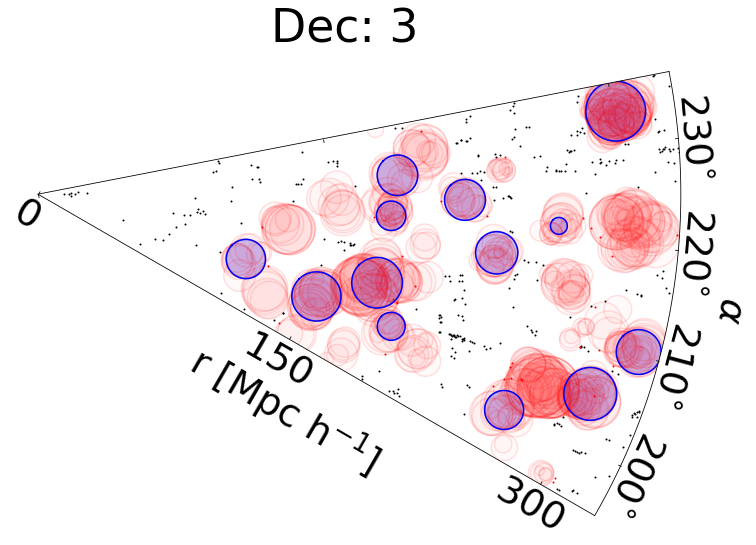

In [203]:
print("SDSS")
sdss_slice_plot = vm_sdss.pvf1(3,1,1000, 195, 236, 0, .114)

DESI


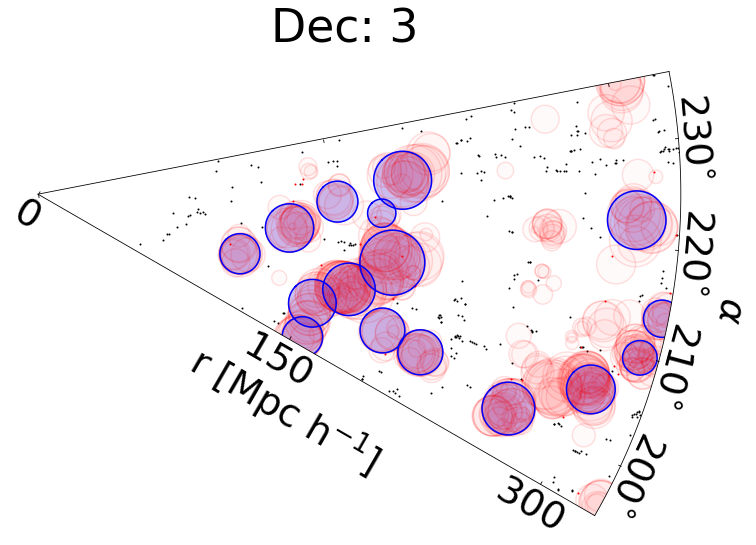

In [204]:
print("DESI")
desi_slice_plot = vm_desi.pvf1(3,1,1000, 195, 236, 0, .114)

In [178]:
sdss_maxs.write('sdss_slice_maximals.fits', overwrite=True)
desi_maxs.write('desi_slice_maximals.fits', overwrite=True)
sdss_holes.write('sdss_slice_holes.fits', overwrite=True)
desi_holes.write('desi_slice_holes.fits', overwrite=True)

In [179]:
sdss_gals.write('sdss_slice_galaxies.fits', overwrite=True)

### Calculate Void Volumes and Display the Void Spectrum

In [322]:
sdss_volumes=np.zeros((len(sdss_maxs),5))
array_of_row = lambda row: np.lib.recfunctions.structured_to_unstructured(np.array(row))
for i in range(0, len(sdss_maxs)):
    flag=sdss_maxs[i]["flag"]
    maximal = array_of_row(sdss_maxs[i]["x","y","z","radius"])
    holes = array_of_row(sdss_holes_full[np.where(sdss_holes_full["flag"]==flag)]["x","y","z","radius"])
    xyzr = np.vstack((maximal, holes))
    ivol, idv, uvol, udv = volume_of_spheres(xyzr[:,:-1], xyzr[:,-1])
    sdss_volumes[i] = np.array([ivol, idv, uvol, udv, flag])

We can check that the SDSS volumes are caclulated correctly by comparing with those given in the catalog. The below ratios should all be approximately 1

In [327]:
sdss_volumes[:,2]/(4/3*np.pi*sdss_maxs["Reff"].data**3)

array([0.97367986, 1.00123667, 0.99127818, 0.99537144, 1.00379332,
       1.01653986, 0.99162807, 0.99721346, 0.99675246, 1.00714973,
       1.02743631, 0.99209436, 0.98503487, 0.99609117, 0.99358617,
       1.02001503, 0.97441124, 0.98875648, 0.98547242, 1.0007233 ,
       1.01379875, 1.00153126])

In [329]:
desi_volumes=np.zeros((len(desi_maxs),5))
for i in range(0, len(desi_maxs)):
    flag=desi_maxs[i]["flag"]
    maximal = array_of_row(desi_maxs[i]["x","y","z","radius"])
    holes = array_of_row(desi_holes_full[np.where(desi_holes_full["flag"]==flag)]["x","y","z","radius"])
    xyzr = np.vstack((maximal, holes))
    ivol, idv, uvol, udv = volume_of_spheres(xyzr[:,:-1], xyzr[:,-1])
    desi_volumes[i] = np.array([ivol, idv, uvol, udv, flag])

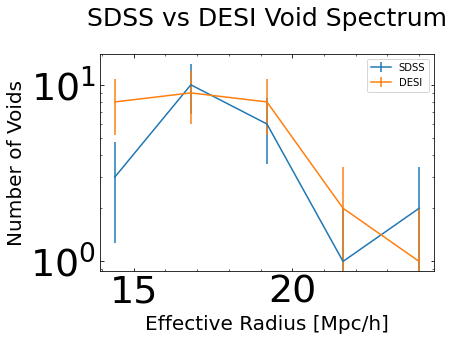

In [353]:
#counts, bins = np.histogram(sdss_maxs["Reff"],bins=5,range=(12,24))
#dx=bins[1]-bins[0]
#plt.plot(bins[:-1]+dx,counts)
#plt.errorbar(bins[:-1]+dx,counts,yerr=np.sqrt(counts),label="SDSS (Catalog)")

counts, bins = np.histogram(((3/4)*sdss_volumes[:,2]/np.pi)**(1/3),bins=5,range=(12,24))
dx=bins[1]-bins[0]
#plt.plot(bins[:-1]+dx,counts)
plt.errorbar(bins[:-1]+dx,counts,yerr=np.sqrt(counts),label="SDSS")

counts, bins = np.histogram(((3/4)*desi_volumes[:,2]/np.pi)**(1/3),bins=5,range=(12,24))
dx=bins[1]-bins[0]
#plt.plot(bins[:-1]+dx,counts)
plt.errorbar(bins[:-1]+dx,counts, yerr=np.sqrt(counts),label="DESI")

plt.xlabel("Effective Radius [Mpc/h]",fontsize=20)
plt.ylabel("Number of Voids",fontsize=20)
plt.title("SDSS vs DESI Void Spectrum",y=1.1,fontsize=25)
plt.legend(loc="upper right",fontsize=10)
plt.yscale("log")